In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import ast

In [2]:
# Load the data
movie_data = pd.read_csv('data/processed_data.csv')
# Check the first few rows of the DataFrame
movie_data.head()

,languages,genres,title,release_date,countries,movie_box_office_revenue,plot_summary,feature_length
0,['Tamil Language'],['Drama'],Periya Idathu Penn,1963,['India'],NaN,Murugappa is a small time farm labourer who l...,NaN
1,['English Language'],"['Thriller', 'Mystery', 'Crime Fiction', 'Dram...",The Flock,2007,['United States of America'],NaN,A hyper-vigilant agent of the Department of Pu...,96.0
2,['Hindi Language'],"['Action', 'Drama']",Gang,2000-04-14,['India'],NaN,"Four friends- Gangu , Abdul , Nihal and Gary ...",NaN
3,"['Tagalog language', 'Filipino language', 'Eng...","['LGBT', 'Drama', 'Filipino Movies', 'World ci...",Daybreak,2008-02-20,['Philippines'],NaN,A married man is having an affair with another...,85.0
4,['English Language'],"['Romantic comedy', 'Romance Film', 'Indie', '...",Tomboy,1985-01-25,['United States of America'],14100000.0,"The movie concerns the life of Tomasina ""Tommy...",91.0


In [3]:
# Check for missing values
movie_data.isnull().sum()

languages                       0
genres                          0
title                          78
release_date                 1939
countries                       0
movie_box_office_revenue    24621
plot_summary                    0
feature_length               4745
dtype: int64

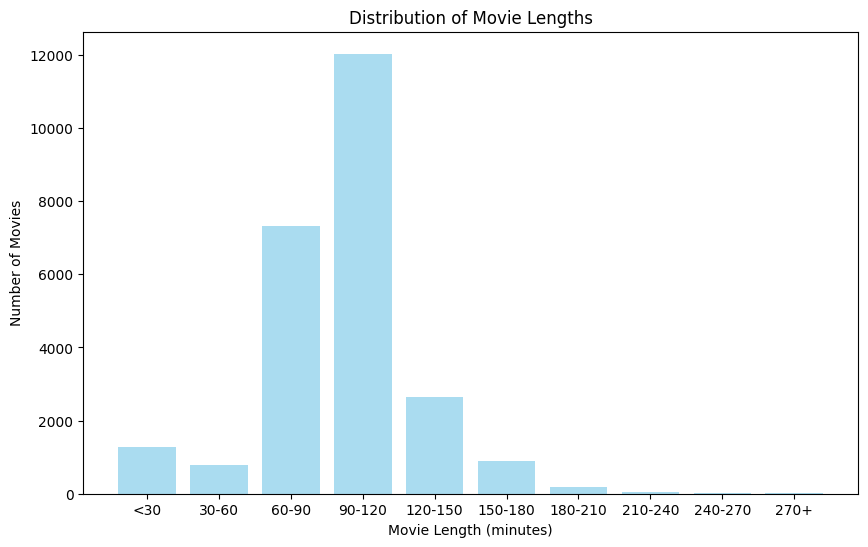

In [4]:
# Create bins for different lengths of movies
bins = [0, 30, 60, 90, 120, 150, 180, 210, 240, 270, 300]

# Create labels for the bins
labels = ['<30', '30-60', '60-90', '90-120', '120-150', '150-180', '180-210', '210-240', '240-270', '270+']

# Add a new column to the DataFrame with the binned lengths
movie_data['length_category'] = pd.cut(movie_data['feature_length'], bins=bins, labels=labels)

# Count the number of movies in each category
length_counts = movie_data['length_category'].value_counts().sort_index()

# Plot a bar chart of movie length categories
plt.figure(figsize=(10, 6))
plt.bar(length_counts.index, length_counts.values, color='skyblue', alpha=0.7)
plt.xlabel('Movie Length (minutes)')
plt.ylabel('Number of Movies')
plt.title('Distribution of Movie Lengths')
plt.show()

Here is a bar chart showing the distribution of movie lengths, grouped into categories. The x-axis represents the length of the movie in minutes, divided into categories, and the y-axis represents the number of movies in each category.

This chart provides a clear visualization of the distribution of movie lengths:

The majority of movies are between 60 and 120 minutes long.
Movies that are less than 30 minutes or more than 240 minutes long are relatively rare.

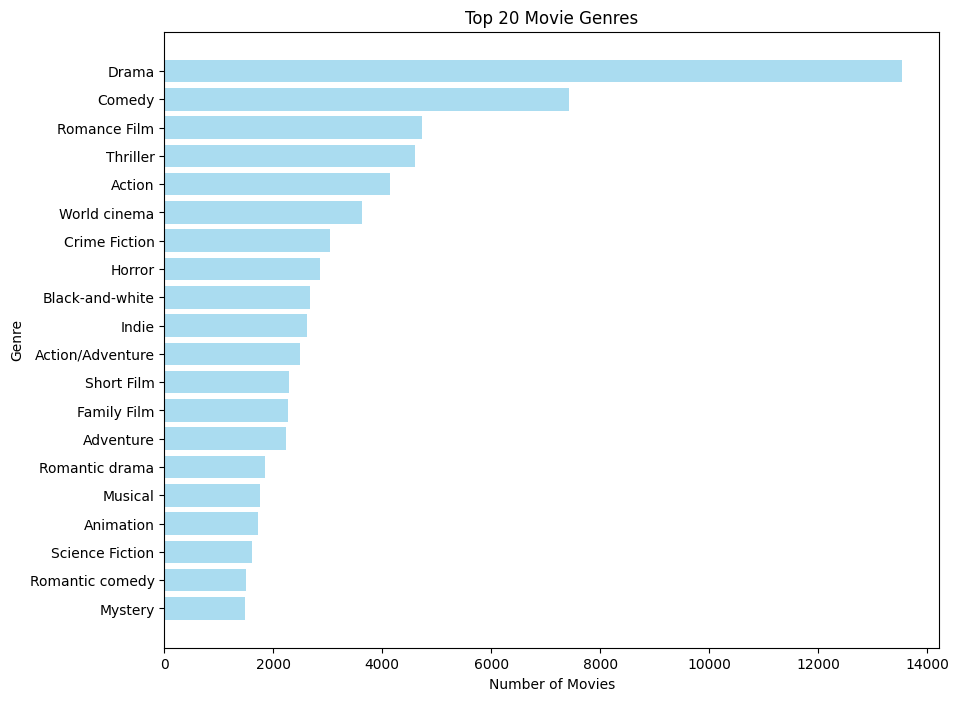

In [5]:
# Load the data
# movie_data = pd.read_csv('data/processed_data.csv')

# Convert the 'genres' column from string format to actual list format
movie_data['genres'] = movie_data['genres'].apply(ast.literal_eval)

# Initialize a dictionary to hold genre counts
genre_counts = {}

# Calculate genre counts
for genres in movie_data['genres']:
    for genre in genres:
        if genre not in genre_counts:
            genre_counts[genre] = 1
        else:
            genre_counts[genre] += 1

# Convert the dictionary to a DataFrame for easier plotting
genre_counts_df = pd.DataFrame(list(genre_counts.items()), columns=['Genre', 'Count'])

# Sort the DataFrame by count
genre_counts_df = genre_counts_df.sort_values('Count', ascending=False)

# Plot a bar chart of the top 20 genres
plt.figure(figsize=(10, 8))
plt.barh(genre_counts_df['Genre'][:20], genre_counts_df['Count'][:20], color='skyblue', alpha=0.7)
plt.xlabel('Number of Movies')
plt.ylabel('Genre')
plt.title('Top 20 Movie Genres')
plt.gca().invert_yaxis()
plt.show()

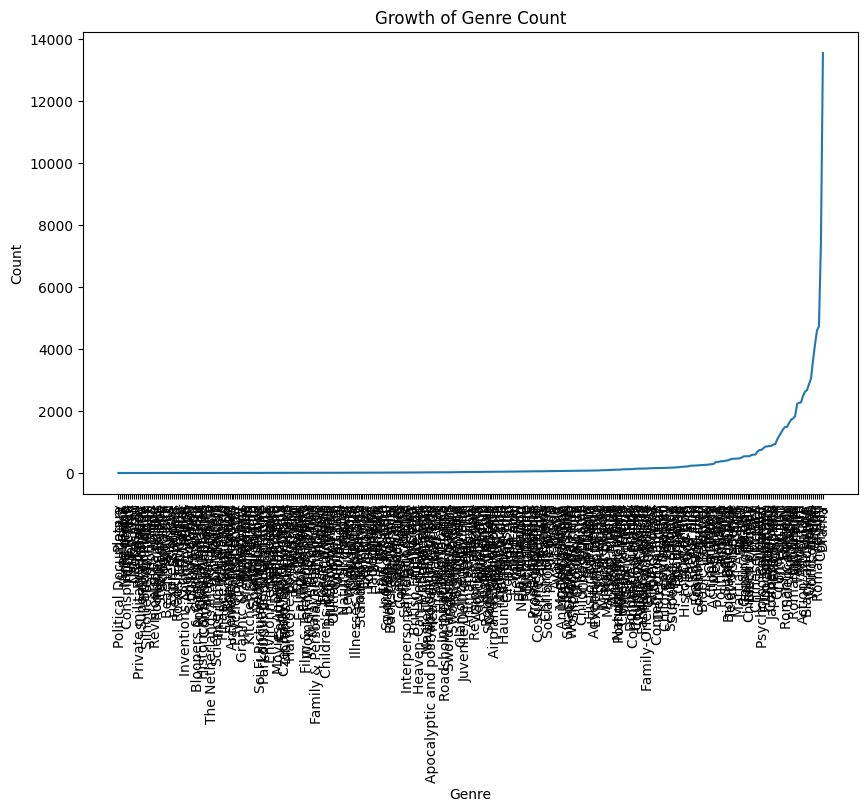

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import ast

# Load the data
data = pd.read_csv('data/processed_data.csv')

# Convert the 'genres' column from string format to actual list format
data['genres'] = data['genres'].apply(ast.literal_eval)

# Initialize a dictionary to hold genre counts
genre_counts = {}

# Calculate genre counts
for genres in data['genres']:
    for genre in genres:
        if genre not in genre_counts:
            genre_counts[genre] = 1
        else:
            genre_counts[genre] += 1

# Convert the dictionary to a DataFrame for easier plotting
genre_counts_df = pd.DataFrame(list(genre_counts.items()), columns=['Genre', 'Count'])

# Sort the DataFrame by count
genre_counts_df = genre_counts_df.sort_values('Count')

# Calculate the cumulative sum of the 'Count' column
genre_counts_df['Cumulative Count'] = genre_counts_df['Count'].cumsum()

# Plot the growth of the cumulative count
plt.figure(figsize=(10, 6))
plt.plot(genre_counts_df['Genre'], genre_counts_df['Count'])
plt.xticks(rotation=90)
plt.xlabel('Genre')
plt.ylabel('Count')
plt.title('Growth of Genre Count')
plt.show()


Here is the bar chart showing the top 20 movie genres. The y-axis represents the genre, and the x-axis represents the number of movies in that genre. Drama, Comedy, and Romance appear to be the most common genres.


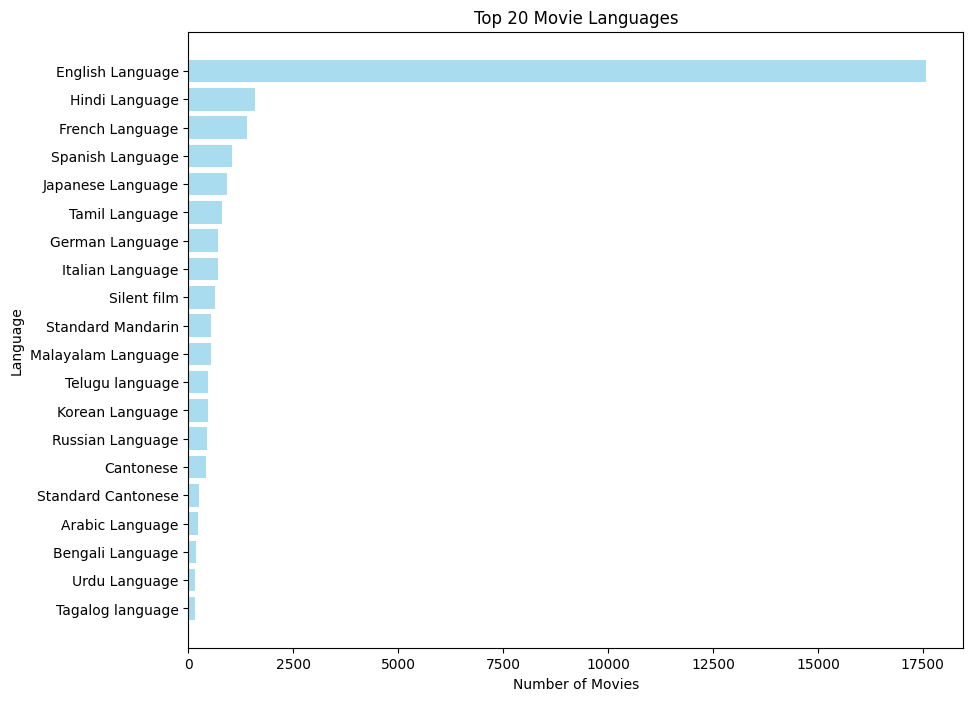

In [7]:
# Convert the 'genres' column from string format to actual list format
movie_data['languages'] = movie_data['languages'].apply(ast.literal_eval)

# Initialize a dictionary to hold genre counts
lang_counts = {}

# Calculate genre counts
for langs in movie_data['languages']:
    for lang in langs:
        if lang not in lang_counts:
            lang_counts[lang] = 1
        else:
            lang_counts[lang] += 1

# Convert the dictionary to a DataFrame for easier plotting
lang_counts_df = pd.DataFrame(list(lang_counts.items()), columns=['Language', 'Count'])

# Sort the DataFrame by count
lang_counts_df = lang_counts_df.sort_values('Count', ascending=False)

# Plot a bar chart of the top 20 genres
plt.figure(figsize=(10, 8))
plt.barh(lang_counts_df['Language'][:20], lang_counts_df['Count'][:20], color='skyblue', alpha=0.7)
plt.xlabel('Number of Movies')
plt.ylabel('Language')
plt.title('Top 20 Movie Languages')
plt.gca().invert_yaxis()
plt.show()

Here is the bar chart showing the top 20 countries by the number of movies. The y-axis represents the country, and the x-axis represents the number of movies produced by that country. As we can see, the United States has produced the most movies, followed by the United Kingdom and France.



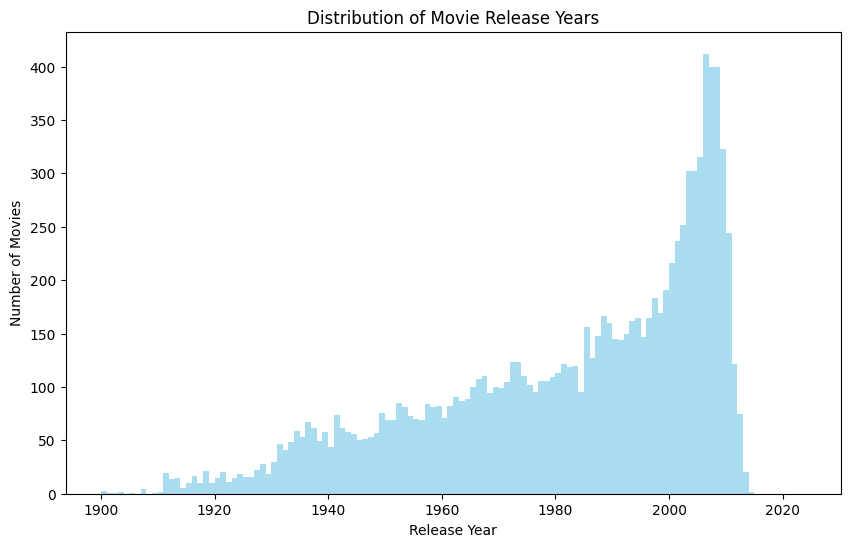

In [8]:
# Convert the 'release_date' column to datetime format and extract the year
movie_data['release_date'] = pd.to_datetime(movie_data['release_date'], errors='coerce')
movie_data['release_year'] = movie_data['release_date'].dt.year

# Plot a histogram of release years
plt.figure(figsize=(10, 6))
plt.hist(movie_data['release_year'].dropna(), bins=range(1900, 2025), color='skyblue', alpha=0.7)
plt.xlabel('Release Year')
plt.ylabel('Number of Movies')
plt.title('Distribution of Movie Release Years')
plt.show()


Here is the histogram showing the distribution of movie release years. The x-axis represents the release year, and the y-axis represents the number of movies. We can see that the number of movies has generally been increasing over the years, with a peak around the early 2000s.

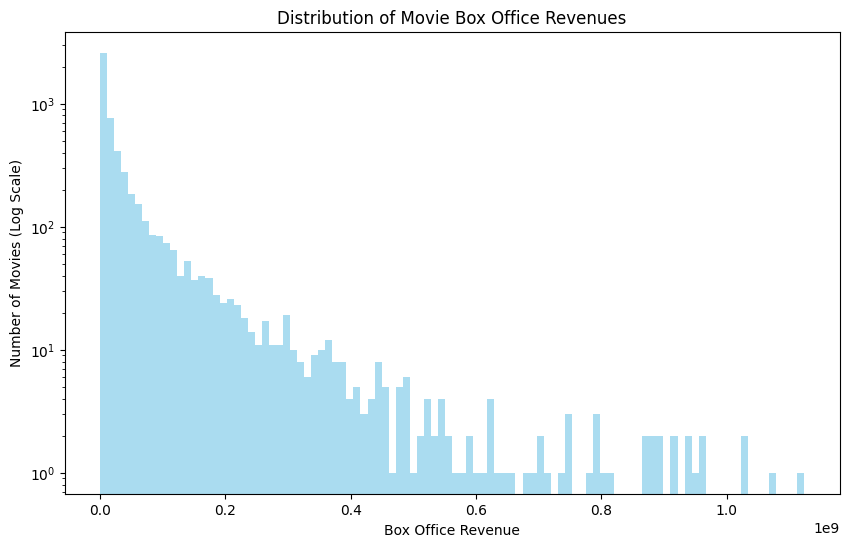

In [9]:
# Convert the 'movie_box_office_revenue' column to numeric format
movie_data['movie_box_office_revenue'] = pd.to_numeric(movie_data['movie_box_office_revenue'], errors='coerce')

# Plot a histogram of movie box office revenues
plt.figure(figsize=(10, 6))
plt.hist(movie_data['movie_box_office_revenue'].dropna(), bins=100, color='skyblue', alpha=0.7, log=True)
plt.xlabel('Box Office Revenue')
plt.ylabel('Number of Movies (Log Scale)')
plt.title('Distribution of Movie Box Office Revenues')
plt.show()


Here is the histogram showing the distribution of movie box office revenues. The x-axis represents the box office revenue, and the y-axis represents the number of movies (in log scale). As we can see, most movies have low box office revenues, while a few movies have very high revenues. This is a common pattern in movie revenues, as only a few movies become blockbusters.